# Repeat the simulation

In the last section you simulated 10 coin tosses and you may or may not have obtained 5 heads (you may have obtained slightly more or fewer than 5). 

So far so good.

What if we would like to quantify how often we get a particular number of heads from 10 coin tosses, ie $k=0,1,2....5.....9,10$?

To answer this we need to run our ' experiment' (get 10 coin tosses and count the heads) not once, but lots of times. 

The computer can easily do this in a few milliseconds, even though it would take us ages with a real coin.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## 10,000 times 10 coin tosses

We are going to simulate tossing the coin 10 times and counting how many head we get, 10,000 times over. This will give us a sense of the frequency of each different outcome (0 heads, 1 head, 2 heads.... 10 heads)

We could use a loop to repeat our 10-coin-toss 'experiment' 10,000 times and each time record the value of $k$, the number of heads

In [2]:
nReps = 10000
# make an empty np array to store the outcomes
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(10,0.5)

In fact, we can use the `size` argument to generate 10,000 values of $k$ for $n=10$ and $p=0.5$, in a single step:

In [3]:
k = np.random.binomial(10, 0.5, size=10000)

The reason for showing how we would do this in a loop is that if you wanted to later generate data from some other distribution, you might not have a handy built-in function to help you so would need to use a loop.

### Frequency of each value of $k$

OK, now we have an array with 10,000 entries showing how many heads we got out of 10 coin tosses, in each of 10,000 repeats.

* **Remember:** one repeat or *rep* is one round of 10 coin tosses; the outcome for each *rep* is a value *k* (between 0 and 10), which is the number of 'heads'.

To summarize the outcomes of these 10,000 reps, we can use `sns.countplot()` to plot the frequencies of each value of $k$

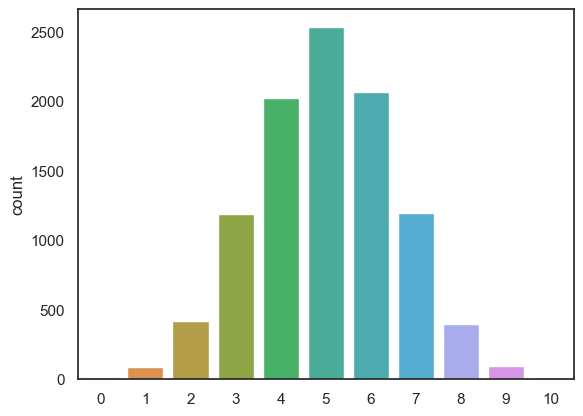

In [4]:
sns.countplot(x=k) 
plt.show()

We can see that 
* unsurprisingly, 5 is the most likely number of heads given $n=10$ and $p=0.5$
* values of $k$ close to 5 are also quite likely
* It is unlikely that we get 0 or 10 heads

### Probability of exactly 8 heads

All the values of $k$ for the 10000 repeats of the experiemnt are stored in the `numpy` array `k`.

We can work out the probability of obtaining exactly 8 heads, as follows:

In [5]:
np.mean(k==8)
# remember, k is a list of 10,000 values of k from our 10,000 reps
# the code (k==8) turns this list into 1 (for reps where k==8) and 0 (elsewhere)
# sum(k==8) would therefore count the number of times k==8
# np.mean(k==8) is the same as sum(k==8)/len(k)

0.0397

... about 4%.

### Probability of at least 8 heads

We might be interested in the probability of obtaining some value *or higher* of $k$ - for example, what is the chance of getting 8 or more heads from a fair coin?

In [6]:
sum(k>=8)/nReps

0.0501

... 5.5%